In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\chand\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\chand\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\chand\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\chand\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
yelp = pd.read_csv('C:\\Chandu\\Python\\Refactored_Py_DS_ML_Bootcamp-master\\20-Natural-Language-Processing\\yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp['review_len'] = yelp['text'].apply(len)

In [6]:
yelp.describe()

,stars,cool,useful,funny,review_len
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


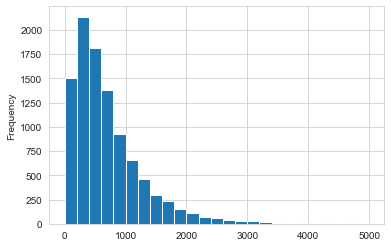

In [9]:
sns.set_style('whitegrid')
yelp['review_len'].plot.hist(bins=25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5E89DD7C8>,
      dtype=object)

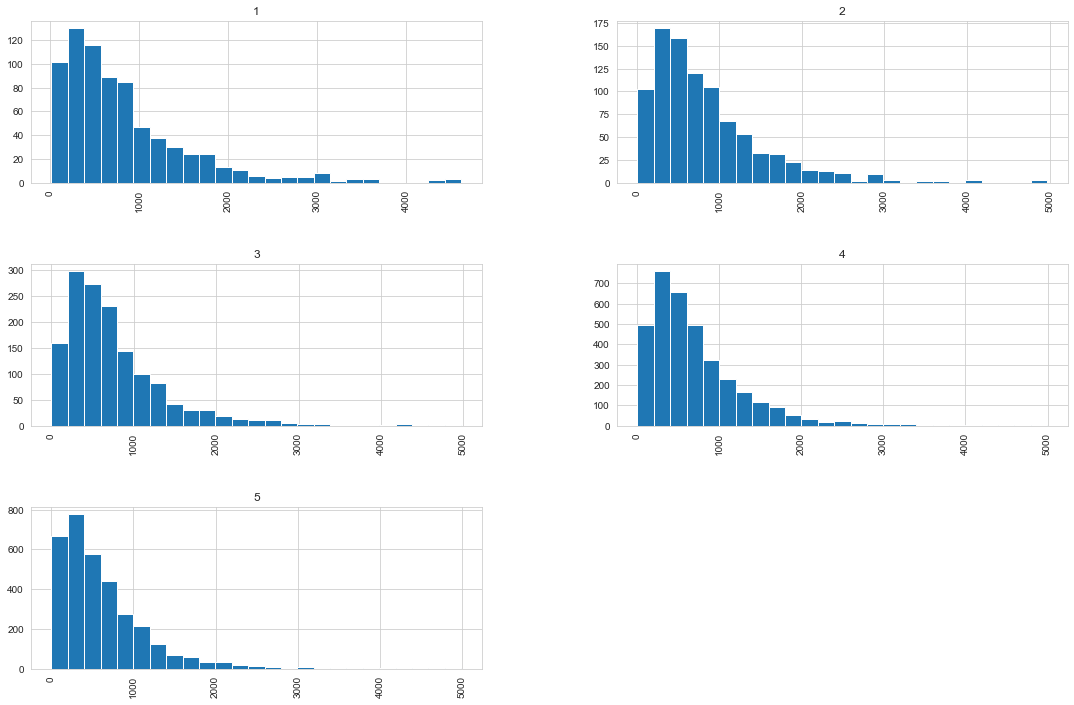

In [13]:
yelp.hist(column='review_len',by='stars',bins=25,figsize=(18,12))

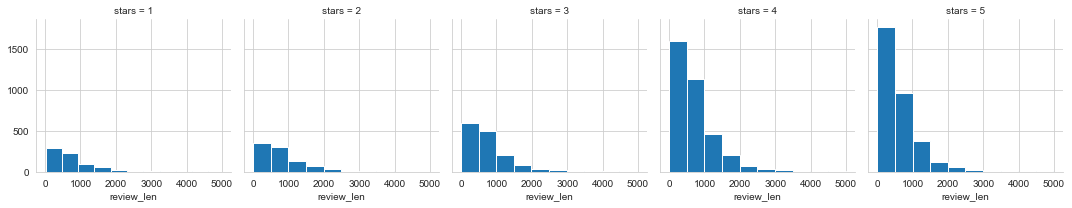

In [15]:
g = sns.FacetGrid(data=yelp,col='stars')
g.map(plt.hist,'review_len')

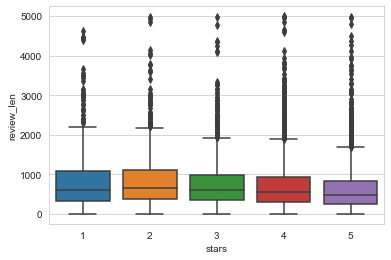

In [16]:
sns.boxplot(x='stars',y='review_len',data=yelp)

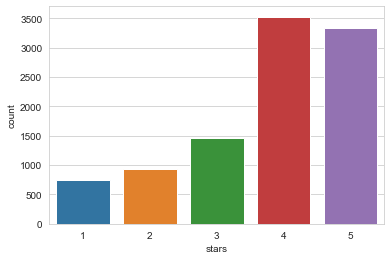

In [19]:
sns.countplot(x='stars',data=yelp)

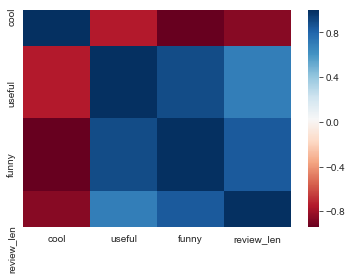

In [27]:
sns.heatmap(yelp.groupby(by='stars').mean().corr(),cmap='RdBu')

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
yelp_1_5 = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [37]:
yelp_1_5.groupby(by='stars').count()

,business_id,date,review_id,text,type,user_id,cool,useful,funny,review_len
stars,,,,,,,,,,
1,749,749,749,749,749,749,749,749,749,749
5,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337


In [40]:
yelp_1_5.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [45]:
yelp_1_5.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'review_len'],
      dtype='object')

In [55]:
X = yelp_1_5[['text']]
y = yelp_1_5[['stars']]

In [56]:
X.head()

,text
0,My wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,General Manager Scott Petello is a good egg!!!...
6,Drop what you're doing and drive here. After I...


In [39]:
yelp_cv = CountVectorizer()

In [57]:
X = yelp_cv.fit_transform(X['text'])

In [58]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [64]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
y_train.head()

,stars
3608,5
2397,5
6066,5
7366,1
5888,5


In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
yelp_m = MultinomialNB()

In [68]:
yelp_m.fit(X_train,y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
yelp_m_predict = yelp_m.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,yelp_m_predict))
print('\n')
print(confusion_matrix(y_test,yelp_m_predict))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



[[159  69]
 [ 22 976]]


In [72]:
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
yelp_tfidf = TfidfTransformer()

In [76]:
X_1 = yelp_tfidf.fit_transform(X)

In [77]:
X_1.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06146797, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y, test_size=0.3,random_state=101)
yelp_m1 = MultinomialNB()
yelp_m1.fit(X_train1,y_train1)
yelp_m_predict1 = yelp_m1.predict(X_test1)
print(classification_report(y_test1,yelp_m_predict1))
print('\n')
print(confusion_matrix(y_test1,yelp_m_predict1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



[[  0 228]
 [  0 998]]


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
